In [28]:

import json
import statistics
import matplotlib.pyplot as plt
import numpy as np

with open("../data/edh1.dck", 'r') as f:
    decktxt = f.read()
with open('/storage/datasets/mtg-tcg/oracle-cards.json') as f:
    oracle = json.load(f)

decklist = []
for line in decktxt.split("\n"):
    if len(line) > 1:
        if line[0].isnumeric():
            line = line.rstrip().split()
            decklist.append(' '.join(line[2:]) * int(line[0]))

oracledeck = [card for card in oracle if card['name'] in decklist]


In [45]:
cmcs = {
    'creature': [0,0,0,0,0,0,0,0],
    'instant': [0,0,0,0,0,0,0,0],
    'sorcery': [0,0,0,0,0,0,0,0],
    'enchantment': [0,0,0,0,0,0,0,0],
    'artifact': [0,0,0,0,0,0,0,0]
}

for card in oracledeck:
    cmc = int(card["cmc"])
    if cmc > 7: cmc = 7

    cardtype = card['type_line']
    if "creature" in cardtype.lower():
        cmcs["creature"][cmc] += 1
    if "instant" in cardtype.lower():
        cmcs["instant"][cmc] += 1
    if "sorcery" in cardtype.lower():
        cmcs["sorcery"][cmc] += 1
    if "enchantment" in cardtype.lower():
        cmcs["enchantment"][cmc] += 1
    if "artifact" in cardtype.lower():
        cmcs["artifact"][cmc] += 1
print(cmcs)

{'creature': [1, 6, 6, 9, 4, 0, 1, 1], 'instant': [1, 11, 2, 4, 1, 2, 0, 0], 'sorcery': [0, 2, 3, 1, 0, 0, 0, 0], 'enchantment': [0, 2, 2, 1, 0, 0, 0, 0], 'artifact': [5, 3, 5, 0, 3, 0, 0, 0]}


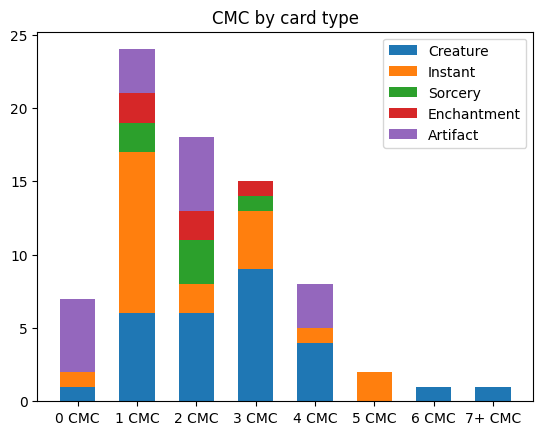

In [54]:
species = ('0 CMC', '1 CMC', '2 CMC', '3 CMC', '4 CMC', '5 CMC', '6 CMC', '7+ CMC')
cmc_counts = {
    'Creature': np.array(cmcs['creature']),
    'Instant': np.array(cmcs['instant']),
    'Sorcery': np.array(cmcs['sorcery']),
    'Enchantment': np.array(cmcs['enchantment']),
    'Artifact': np.array(cmcs['artifact']),
}
width = 0.6
fig, ax = plt.subplots()
bottom = np.zeros(8)

for cmc, cmc_count in cmc_counts.items():
    p = ax.bar(species, cmc_count, width, label=cmc, bottom=bottom)
    bottom += cmc_count

    #ax.bar_label(p, label_type='center')

ax.set_title('CMC by card type')
ax.legend()
plt.show()